## Use PIMS to load video and sequential images

``pims`` provides three classes for loading video.

* ``ImageSequence`` reads images from a directory.
* ``Video`` reads standard video files (AVI, MOV, etc.).
* ``TiffStack`` reads multi-frame TIF / TIFF files.

Once loaded, these objects can be handled alike. In software terms, each is a subclass of a generic ``Frames`` object.
The differences between the formats are handled quietly by ``pims``.

### Load sequential images from a directory.

Take ``ImageSequence`` as an example. We have a folder of images here:

In [2]:
ls image_sequence

T76S3F00001.png  T76S3F00003.png  T76S3F00005.png
T76S3F00002.png  T76S3F00004.png


We can load them into an ``ImageSequence`` object.

In [3]:
import pims

In [4]:
v = pims.ImageSequence('image_sequence/*.png')

We can see basic properties.

In [5]:
v

<Frames>
Source: /Users/pinghanchu/Documents/Git/Particle_Tracking/TrackPy/image_sequence/*.png
Length: 5 frames
Frame Shape: (424, 640)
Pixel Datatype: uint8

We can print the first frame (it's an array of brightness values) or view those values as an image.

In [13]:
print v[0]

[[121 122 122 ..., 120 119 121]
 [118 119 118 ..., 120 121 122]
 [120 122 118 ..., 121 123 125]
 ..., 
 [125 126 125 ..., 122 122 122]
 [126 127 126 ..., 124 125 125]
 [126 127 126 ..., 126 125 124]]


Frame([[121, 122, 122, ..., 120, 119, 121],
       [118, 119, 118, ..., 120, 121, 122],
       [120, 122, 118, ..., 121, 123, 125],
       ..., 
       [125, 126, 125, ..., 122, 122, 122],
       [126, 127, 126, ..., 124, 125, 125],
       [126, 127, 126, ..., 126, 125, 124]], dtype=uint8)
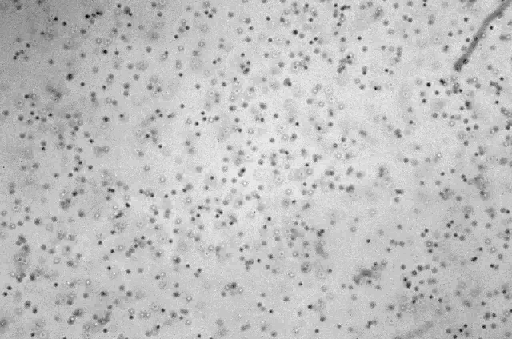

In [9]:
%matplotlib inline
v[0]

### Use subsections of the loaded frames.

We can select a subset of the frames for viewing or processing. Examples:

* ``v[3]`` frame three (an array)
* ``v[:10]`` first 10 frames (a list of arrays)
* ``v[2:5]`` frames 2-5 including 2 and 5 (a list of arrays)
* ``v[100:]`` frames 100 to the end (a list of arrays)

### Loop through the frames to do your image processing.

In [12]:
for frame in v[:]:
    frame
    # Do something with frame, a numpy array.

### Load video files or multi-frame TIFFs.

``ImageSequence`` relies only on ``numpy`` and ``scipy``, which are required dependencies of ``mr``, so it works
out of the box. ``Video`` needs [OpenCV](http://opencv.org/), which includes the Python module ``cv2``.
``TiffStack`` needs ``libtiff``.

Once these dependencies are in place, ``Video`` and ``TiffStack`` work in the same way as ``ImageSequence``.

In [14]:
v = pims.Video('/home/dallan/mr/mr/tests/water/bulk-water.mov')
# This file is not included in PIMS, to keep the file size small.
# Try it with a video file of your own.

In [15]:
v

<Frames>
Source File: /home/dallan/mr/mr/tests/water/bulk-water.mov
Frame Dimensions: 640 x 424
Cursor at Frame 0 of 480

In [8]:
v = pims.TiffStack('tiff_stack.tif')

In [9]:
v

<Frames>
Source: tiff_stack.tif
Length: 5 frames
Frame Shape: 512 x 512
Pixel Datatype: <type 'numpy.uint16'>